## LBPH

Local Binary Patterns Histograms

In [2]:
import os
import cv2
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import zipfile

path = '../../assets/Datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [4]:
def get_image_data():
    paths = [os.path.join('yalefaces/train', f) for f in os.listdir('yalefaces/train')]
    paths = [f.replace('\\', '/') for f in paths]
    
    faces = []
    ids = []
    
    for path in paths:
        image = Image.open(path).convert('L') # 'L'은 Single Channel을 의미합니다.
        image_np = np.array(image, 'uint8')
        
        id = int(os.path.split(path)[1][7:9])
        
        ids.append(id)
        faces.append(image_np)
    
    return np.array(ids), faces

In [5]:
ids, faces = get_image_data()
print(len(ids), len(faces))
print(ids[0], faces[0])
print(type(ids[0]), type(faces[0]))

135 135
1 [[130 130 130 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 252 255 255]
 [255 255 255 ... 255 255 255]
 [ 68  68  68 ...  68  68  68]]
<class 'numpy.int32'> <class 'numpy.ndarray'>


## LBPH Face Recognizer 학습

이 인스턴스에서 중요한 인자는 다음과 같으며, 각 값은 이미지를 몇 개의 그리드로 분리할 지를 의미합니다.

- grid_x : (default 8)
- grid_y : (default 8)

생성 이후에 .train()을 이용해서 Recognizer를 학습할 수 있습니다.<br>
학습된 Recognizer는 .write()를 이용해서 저장할 수 있으며, 기본 확장자는 .yml(.yaml)입니다.

In [6]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(src=faces, labels=ids)

lbph_classifier.write('lbph_classifier.yml')

## LBPH Face Recognizer 로딩 후 사용

미리 학습해둔 LBPH Face Recognizer를 사용할 수 있습니다.

In [7]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()

lbph_classifier.read('./lbph_classifier.yml')

In [8]:
path = './yalefaces/test/subject10.sad.gif'
image = Image.open(path).convert('L')
image_np = np.array(image, 'uint8')
print(image_np.shape)

(243, 320)


- **예측값**

In [9]:
prediction = lbph_classifier.predict(image_np)
print(prediction)

(10, 6.384336446373091)


- **결과값**

In [10]:
expected_output = int(os.path.split(path)[1][7:9])
print(expected_output)

10


- **결과값 이미지 보기**

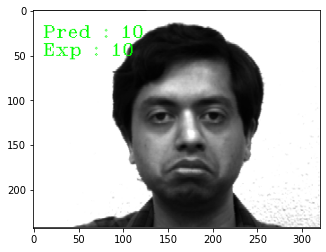

In [11]:
image_np = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
cv2.putText(image_np, 'Pred : ' + str(prediction[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2.putText(image_np, 'Exp : ' + str(expected_output), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))

plt.imshow(image_np)

## LBPH Face Recognizer 평가하기

In [12]:
paths = [os.path.join('yalefaces/test', f) for f in os.listdir('yalefaces/test')]
paths = [f.replace('\\', '/') for f in paths]

predictions = []
expected_outputs = []

for path in paths:
    
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')
    
    prediction, _ = lbph_classifier.predict(image_np)
    expected_output = int(os.path.split(path)[1][7:9])
    
    predictions.append(prediction)
    expected_outputs.append(expected_output)

In [13]:
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(expected_outputs, predictions)

0.6666666666666666

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
cm = confusion_matrix(expected_outputs, predictions)
cm

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

### 평가자료 시각화하기

In [18]:
import seaborn

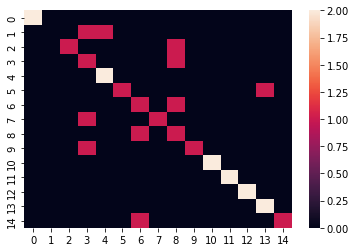

In [19]:
seaborn.heatmap(cm);

## 평가자료 시각화하기 + 파라미터

결과값 N는 prediction이 expectation과 **일치했음**을 의미합니다.<br>
결과값 0은 prediction이 expectation과 **일치하지 않았음**을 의미합니다.

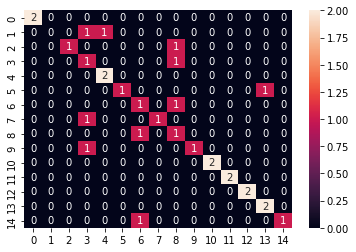

In [20]:
seaborn.heatmap(cm, annot=True);